In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import pandas as pd
from pandas_datareader import data 
import matplotlib.pyplot as plt

sns.set(style='darkgrid', context='talk', palette='Dark2')

Example of web scrapping on Microsoft

In [2]:
start_date = '2000-01-01'
end_date = '2022-10-31'
microsoft = data.DataReader('MSFT', 'yahoo', start_date, end_date)
microsoft

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,59.312500,56.000000,58.687500,58.281250,53228400.0,36.555367
2000-01-04,58.562500,56.125000,56.781250,56.312500,54119000.0,35.320526
2000-01-05,58.187500,54.687500,55.562500,56.906250,64059600.0,35.692932
2000-01-06,56.937500,54.187500,56.093750,55.000000,54976600.0,34.497303
2000-01-07,56.125000,53.656250,54.312500,55.718750,62013600.0,34.948112
...,...,...,...,...,...,...
2022-10-25,251.039993,245.830002,247.259995,250.660004,34775500.0,250.660004
2022-10-26,238.300003,230.059998,231.169998,231.320007,82543200.0,231.320007
2022-10-27,233.690002,225.779999,231.039993,226.750000,40424600.0,226.750000


Having imported the appropriate tools, getting market data from a free online source, such as Yahoo Finance, is super easy. Since pandas has a simple remote data access for the Yahoo Finance API data, this is as simple as:

In [3]:
def web_scrapper():
    tickers = pd.read_csv("CSV/constituents.csv")
    tickers_symbol = tickers['Symbol']

    # Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
    # tickers = ['AAPL', 'MSFT', 'GOOG', 'META']

    # We would like all available data from 01/01/2000 until 2022-10-31.
    start_date = '2000-01-01'
    end_date = '2022-10-31'

    # User pandas_reader.data.DataReader to load the desired data.
    df = data.DataReader(tickers_symbol, 'yahoo', start_date, end_date) # I commented this line because I saved the scrapped data into a .csv
    microsoft = data.DataReader('MSFT', 'yahoo', start_date, end_date)
    close = df['Close']
    volume = df['Volume']

    #Let us assume we are interested in working with the Close prices which have been already been adjusted by Yahoo finance to account for stock splits. We want to make sure that all weekdays are included in our dataset, which is very often desirable for quantitative trading strategies.

    #Of course, some of the weekdays might be public holidays in which case no price will be available. For this reason, we will fill the missing prices with the latest available prices:

    all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')  # B stands for business day frequency
    close = close.reindex(all_weekdays)
    close = close.fillna(method='ffill')
    # close.set_index(microsoft.index)    
    volume = volume.reindex(all_weekdays)
    volume = volume.fillna(method='ffill')
    # volume.set_index(microsoft.index)   
    df = df.reindex(all_weekdays)
    df = df.fillna(method='ffill')  

    # df.to_csv("CSV/sp500.csv",index=False)
    # close.to_csv("CSV/sp500-close.csv",index=False)
    # volume.to_csv("CSV/sp500-volume.csv", index=False)

    df.to_csv("CSV/sp5002.csv",index=False)
    close.to_csv("CSV/sp5002-close.csv",index=False)
    volume.to_csv("CSV/sp5002-volume.csv", index=False)

    return df, close, volume


In [4]:
# web_scrapper()

In [5]:
sp500 = pd.read_csv("CSV/sp5002.csv")
close = pd.read_csv("CSV/sp5002-close.csv")
volume = pd.read_csv("CSV/sp5002-volume.csv")

/home/joaodocarglass/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,2

#### Preparing the Data

Let us assume we are interested in working with the Close prices which have been already been adjusted by Yahoo finance to account for stock splits. We want to make sure that all weekdays are included in our dataset, which is very often desirable for quantitative trading strategies.

Of course, some of the weekdays might be public holidays in which case no price will be available. For this reason, we will fill the missing prices with the latest available prices:

Let's build a function to drop columns with nulls percentage above 25

In [6]:
def drop_null_columns(data):
    nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
    nulls_percent_df.columns = ['column_name', 'nulls_percentage']
    # nulls_percent_df.head()
    columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0]
    # print(len(columns_above_threshold['column_name']))
    drop_columns_list = list(columns_above_threshold['column_name'])
    # print(drop_columns_list)
    data = data.drop(columns=drop_columns_list)
    data.shape
    return data

In [7]:
close.isna().sum()

MMM        0
AOS        0
ABT        0
ABBV    3392
ABMD       0
        ... 
KSU     5956
PBCT    5956
VIAC    5956
WLTW    5956
XLNX    5956
Length: 505, dtype: int64

In [8]:
close = drop_null_columns(close)

In [9]:
volume = drop_null_columns(volume)

In [10]:
close.isna().sum()

MMM     0
AOS     0
ABT     0
ABMD    0
ATVI    0
       ..
WMB     0
XEL     0
YUM     0
ZBRA    0
ZION    0
Length: 364, dtype: int64

#### Now we are going to create 100 random portfolios for the close and the volume
#### Each sample will be of 5 samples from the whole population

In [11]:
close

,MMM,AOS,ABT,ABMD,ATVI,ADM,ADBE,AMD,AES,AFL,...,WELL,WST,WDC,WY,WHR,WMB,XEL,YUM,ZBRA,ZION
0,47.187500,3.614583,15.711531,18.250000,1.369792,10.884354,16.390625,15.500000,36.250000,11.187500,...,15.375000,7.562500,3.937500,69.875000,61.812500,23.198961,19.000000,6.706057,25.027779,55.500000
1,45.312500,3.562500,15.262630,17.812500,1.328125,10.770975,15.015625,14.625000,34.812500,10.890625,...,15.312500,7.640625,4.687500,67.250000,59.437500,22.684469,19.437500,6.571262,24.666668,52.812500
2,46.625000,3.552083,15.234574,18.000000,1.333333,10.600907,15.312500,15.000000,35.187500,10.828125,...,15.750000,7.609375,4.375000,70.812500,60.312500,24.087631,20.187500,6.604960,25.138889,52.750000
3,50.375000,3.500000,15.767643,18.031250,1.307292,10.657596,15.437500,16.000000,35.468750,11.046875,...,16.562500,7.531250,4.562500,74.125000,60.812500,24.602125,20.000000,6.548796,23.777779,53.500000
4,51.375000,3.645833,15.935981,17.937500,1.343750,10.827664,16.187500,16.250000,36.156250,11.265625,...,16.812500,7.609375,5.625000,71.687500,61.000000,25.256933,20.000000,6.402768,23.513889,53.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5951,118.500000,52.099998,97.949997,264.290009,72.500000,91.139999,323.790009,61.470001,25.190001,61.950001,...,60.360001,249.210007,35.290001,30.910000,137.000000,31.850000,62.400002,111.239998,274.579987,51.509998
5952,122.699997,51.950001,98.419998,268.250000,72.480003,93.589996,320.480011,59.730000,25.450001,61.959999,...,60.400002,254.399994,35.279999,30.959999,134.740005,32.150002,62.570000,112.269997,273.179993,50.400002
5953,122.800003,51.900002,96.930000,267.579987,72.500000,94.129997,318.649994,58.599998,25.770000,62.700001,...,59.939999,221.229996,34.340000,31.010000,135.029999,32.500000,63.250000,113.910004,275.290009,50.380001
5954,126.599998,54.380001,99.489998,258.059998,72.849998,94.879997,325.679993,62.009998,26.459999,64.790001,...,61.500000,225.509995,35.500000,31.100000,139.910004,32.669998,65.370003,117.879997,288.000000,51.540001


In [12]:
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')  # B stands for business day frequency

microsoft = microsoft.reindex(all_weekdays)
microsoft = microsoft.fillna(method='ffill')

In [13]:
microsoft.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21',
               '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-31'],
              dtype='datetime64[ns]', length=5956, freq='B')

In [14]:
close.set_index(microsoft.index, inplace=True)
volume.set_index(microsoft.index, inplace=True)

In [15]:
def random_portfolios(data):
    import random
    list_of_portfolios = []
    tickers_data = list(data.columns.values)
    for i in range(10000):
        portofolio_aleatorio = random.sample(tickers_data, 5)
        list_of_portfolios.append(data[portofolio_aleatorio])
    return list_of_portfolios

In [16]:
list_of_portfolios_close = random_portfolios(close)

In [17]:
list_of_portfolios_volume = random_portfolios(volume)

In [18]:
list_of_portfolios_close[0]

,CSX,ED,BRO,ES,PKI
2000-01-03,1.718750,33.750000,2.367188,20.687500,20.718750
2000-01-04,1.666667,34.187500,2.367188,20.687500,19.750000
2000-01-05,1.701389,35.750000,2.359375,20.812500,19.531250
2000-01-06,1.777778,35.812500,2.359375,21.062500,19.781250
2000-01-07,1.777778,36.062500,2.390625,21.250000,20.031250
...,...,...,...,...,...
2022-10-25,28.760000,85.849998,55.099998,74.150002,136.429993
2022-10-26,28.770000,85.739998,55.950001,74.029999,136.440002
2022-10-27,28.809999,86.419998,56.700001,74.669998,135.300003
2022-10-28,29.219999,88.449997,58.639999,76.769997,135.940002


In [19]:
best_portfolio_values = [0]
best_portfolio = []
for x in range(10000):
    stock_performance = []
    for i in list_of_portfolios_close[x]:
        stock_performance.append(list_of_portfolios_close[x][i][-1:].values[0] - list_of_portfolios_close[x][i][0:].values[0])
    
    if np.mean(best_portfolio_values) < np.mean(stock_performance):
        best_portfolio_values = stock_performance
        best_portfolio = list_of_portfolios_close[x].columns


best_portfolio_values, best_portfolio

([299.032479763031,
  27.160003662109375,
  2502.3173828125,
  4191.1875,
  43.025001525878906],
 Index(['POOL', 'HIG', 'AZO', 'NVR', 'CAH'], dtype='object'))

In [20]:
best = pd.DataFrame(best_portfolio_values, best_portfolio).T
best

,POOL,HIG,AZO,NVR,CAH
0,299.03248,27.160004,2502.317383,4191.1875,43.025002


In [21]:
# stock_performance = list_of_portfolios[0]['GLW'][-1:].values[0] - list_of_portfolios[0]['GLW'][0:].values[0]

In [22]:
def close_print(stock_symbol):
    
    df = data.DataReader(stock_symbol, 'yahoo', start_date, end_date)
    close = df['Close']
    all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')  # B stands for business day frequency
    close = close.reindex(all_weekdays)
    close = close.fillna(method='ffill')

    for i in stock_symbol:
        # Get the ticker timeseries. This now returns a Pandas Series object indexed by date.
        ticker = close.loc[:, i]

        # Calculate the 20 and 100 days moving averages of the closing prices
        short_rolling_ticker = ticker.rolling(window=20).mean()
        long_rolling_ticker = ticker.rolling(window=100).mean()

        # Plot everything by leveraging the very powerful matplotlib package
        fig, ax = plt.subplots(figsize=(18,11))

        plt.title(i)

        ax.plot(ticker.index, ticker, label=i)
        ax.plot(short_rolling_ticker.index, short_rolling_ticker, label='20 days rolling')
        ax.plot(long_rolling_ticker.index, long_rolling_ticker, label='100 days rolling')

        ax.set_xlabel('Date')
        ax.set_ylabel('Adjusted closing price ($)')
        ax.legend()
    close.to_csv("CSV/close.csv", index=True)


In [23]:
def close_print2(stock_symbol):
    
    df = data.DataReader(stock_symbol, 'yahoo', start_date, end_date)
    close = df['Close']
    all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')  # B stands for business day frequency
    close = close.reindex(all_weekdays)
    close = close.fillna(method='ffill')

    for i in stock_symbol:
        # Get the ticker timeseries. This now returns a Pandas Series object indexed by date.
        ticker = close.loc[:, i]

        # Calculate the 20 and 100 days moving averages of the closing prices
        short_rolling_ticker = ticker.rolling(window=20).mean()
        long_rolling_ticker = ticker.rolling(window=100).mean()

        # Plot everything by leveraging the very powerful matplotlib package
        fig, ax = plt.subplots(figsize=(18,11))

        plt.title(i)

        ax.plot(ticker.index, ticker, label=i)
        ax.plot(short_rolling_ticker.index, short_rolling_ticker, label='20 days rolling')
        ax.plot(long_rolling_ticker.index, long_rolling_ticker, label='100 days rolling')

        ax.set_xlabel('Date')
        ax.set_ylabel('Adjusted closing price ($)')
        ax.legend()
    close.to_csv("CSV/close.csv", index=True)


#### What does moving average tells us?
A moving average (MA) is a stock indicator commonly used in technical analysis, used to help smooth out price data by creating a constantly updated average price. A rising moving average indicates that the security is in an uptrend, while a declining moving average indicates a downtrend.

In [24]:
# close_print(best.columns)

In [25]:
def volume_print(stock_symbol):
    
    df = data.DataReader(stock_symbol, 'yahoo', start_date, end_date)
    volume = df['Volume']
    all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')  # B stands for business day frequency
    volume = volume.reindex(all_weekdays)
    volume = volume.fillna(method='ffill')


    for i in stock_symbol:
        # Get the ticker timeseries. This now returns a Pandas Series object indexed by date.
        ticker = volume.loc[:, i]

        # Calculate the 30 and 100 days moving averages of the closing prices
        short_rolling_ticker = ticker.rolling(window=30).mean()
        long_rolling_ticker = ticker.rolling(window=100).mean()

        # short_rolling_ticker = ticker.rolling(window=30, center=True).mean()
        # long_rolling_ticker = ticker.rolling(window=100, center=True).mean()

        # Plot everything by leveraging the very powerful matplotlib package
        fig, ax = plt.subplots(figsize=(18,11))

        plt.title(i)

        ax.plot(ticker.index, ticker, label=i)
        ax.plot(short_rolling_ticker.index, short_rolling_ticker, label='30 days rolling')
        ax.plot(long_rolling_ticker.index, long_rolling_ticker, label='100 days rolling')

        ax.set_xlabel('Date')
        ax.set_ylabel('Stock Volume')
        ax.legend()

    volume.to_csv("CSV/volume.csv", index=True)


In [26]:
# volume_print(best.columns)

In [27]:
close

,MMM,AOS,ABT,ABMD,ATVI,ADM,ADBE,AMD,AES,AFL,...,WELL,WST,WDC,WY,WHR,WMB,XEL,YUM,ZBRA,ZION
2000-01-03,47.187500,3.614583,15.711531,18.250000,1.369792,10.884354,16.390625,15.500000,36.250000,11.187500,...,15.375000,7.562500,3.937500,69.875000,61.812500,23.198961,19.000000,6.706057,25.027779,55.500000
2000-01-04,45.312500,3.562500,15.262630,17.812500,1.328125,10.770975,15.015625,14.625000,34.812500,10.890625,...,15.312500,7.640625,4.687500,67.250000,59.437500,22.684469,19.437500,6.571262,24.666668,52.812500
2000-01-05,46.625000,3.552083,15.234574,18.000000,1.333333,10.600907,15.312500,15.000000,35.187500,10.828125,...,15.750000,7.609375,4.375000,70.812500,60.312500,24.087631,20.187500,6.604960,25.138889,52.750000
2000-01-06,50.375000,3.500000,15.767643,18.031250,1.307292,10.657596,15.437500,16.000000,35.468750,11.046875,...,16.562500,7.531250,4.562500,74.125000,60.812500,24.602125,20.000000,6.548796,23.777779,53.500000
2000-01-07,51.375000,3.645833,15.935981,17.937500,1.343750,10.827664,16.187500,16.250000,36.156250,11.265625,...,16.812500,7.609375,5.625000,71.687500,61.000000,25.256933,20.000000,6.402768,23.513889,53.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-25,118.500000,52.099998,97.949997,264.290009,72.500000,91.139999,323.790009,61.470001,25.190001,61.950001,...,60.360001,249.210007,35.290001,30.910000,137.000000,31.850000,62.400002,111.239998,274.579987,51.509998
2022-10-26,122.699997,51.950001,98.419998,268.250000,72.480003,93.589996,320.480011,59.730000,25.450001,61.959999,...,60.400002,254.399994,35.279999,30.959999,134.740005,32.150002,62.570000,112.269997,273.179993,50.400002
2022-10-27,122.800003,51.900002,96.930000,267.579987,72.500000,94.129997,318.649994,58.599998,25.770000,62.700001,...,59.939999,221.229996,34.340000,31.010000,135.029999,32.500000,63.250000,113.910004,275.290009,50.380001
2022-10-28,126.599998,54.380001,99.489998,258.059998,72.849998,94.879997,325.679993,62.009998,26.459999,64.790001,...,61.500000,225.509995,35.500000,31.100000,139.910004,32.669998,65.370003,117.879997,288.000000,51.540001


In [28]:
best

,POOL,HIG,AZO,NVR,CAH
0,299.03248,27.160004,2502.317383,4191.1875,43.025002


In [29]:
close[best.columns]

,POOL,HIG,AZO,NVR,CAH
2000-01-03,5.197531,45.250000,30.562500,46.562500,32.875000
2000-01-04,5.098765,43.750000,30.437500,46.000000,32.500000
2000-01-05,5.098765,42.437500,30.312500,45.875000,34.791668
2000-01-06,4.864198,42.812500,29.062500,45.875000,36.000000
2000-01-07,4.839506,44.812500,30.437500,46.750000,39.250000
...,...,...,...,...,...
2022-10-25,298.540009,69.489998,2439.889893,4278.069824,73.720001
2022-10-26,305.880005,69.250000,2423.679932,4185.180176,74.910004
2022-10-27,304.230011,70.250000,2521.770020,4159.520020,75.339996
2022-10-28,318.769989,72.160004,2543.500000,4275.359863,77.139999


In [30]:
volume[best.columns]

,POOL,HIG,AZO,NVR,CAH
2000-01-03,332100.0,571400.0,441000.0,36700.0,1222650.0
2000-01-04,155419.0,856900.0,490600.0,34100.0,1951200.0
2000-01-05,162000.0,797900.0,577400.0,16500.0,2666250.0
2000-01-06,214650.0,975700.0,489600.0,12700.0,1876650.0
2000-01-07,325013.0,1578200.0,472100.0,73400.0,3390300.0
...,...,...,...,...,...
2022-10-25,851300.0,1886100.0,222300.0,20400.0,3451500.0
2022-10-26,927000.0,1859400.0,125000.0,17100.0,2431700.0
2022-10-27,428100.0,2360100.0,235200.0,21700.0,2187700.0
2022-10-28,448800.0,3291500.0,210000.0,12500.0,2137000.0


In [44]:
best.columns[0]

'POOL'

In [59]:
for i in range(len(best.columns)):
    print(close[best.columns[i]])

2000-01-03      5.197531
2000-01-04      5.098765
2000-01-05      5.098765
2000-01-06      4.864198
2000-01-07      4.839506
                 ...    
2022-10-25    298.540009
2022-10-26    305.880005
2022-10-27    304.230011
2022-10-28    318.769989
2022-10-31    304.230011
Freq: B, Name: POOL, Length: 5956, dtype: float64
2000-01-03    45.250000
2000-01-04    43.750000
2000-01-05    42.437500
2000-01-06    42.812500
2000-01-07    44.812500
                ...    
2022-10-25    69.489998
2022-10-26    69.250000
2022-10-27    70.250000
2022-10-28    72.160004
2022-10-31    72.410004
Freq: B, Name: HIG, Length: 5956, dtype: float64
2000-01-03      30.562500
2000-01-04      30.437500
2000-01-05      30.312500
2000-01-06      29.062500
2000-01-07      30.437500
                 ...     
2022-10-25    2439.889893
2022-10-26    2423.679932
2022-10-27    2521.770020
2022-10-28    2543.500000
2022-10-31    2532.879883
Freq: B, Name: AZO, Length: 5956, dtype: float64
2000-01-03      46.562500
2

In [54]:
close[best.columns]

,POOL,HIG,AZO,NVR,CAH
2000-01-03,5.197531,45.250000,30.562500,46.562500,32.875000
2000-01-04,5.098765,43.750000,30.437500,46.000000,32.500000
2000-01-05,5.098765,42.437500,30.312500,45.875000,34.791668
2000-01-06,4.864198,42.812500,29.062500,45.875000,36.000000
2000-01-07,4.839506,44.812500,30.437500,46.750000,39.250000
...,...,...,...,...,...
2022-10-25,298.540009,69.489998,2439.889893,4278.069824,73.720001
2022-10-26,305.880005,69.250000,2423.679932,4185.180176,74.910004
2022-10-27,304.230011,70.250000,2521.770020,4159.520020,75.339996
2022-10-28,318.769989,72.160004,2543.500000,4275.359863,77.139999


In [ ]:
import statsmodels.api as sm
import time

for i in range(len(best.columns)):
    print('mean :' , close[best.columns[i]].mean())
    res = sm.tsa.seasonal_decompose(close[best.columns[i]])
    resplot = res.plot()
    resplot.set_size_inches((14,9))
    resplot.tight_layout()
    # time.sleep(1) # Sleep for 3 seconds



mean : 78.89903364508163


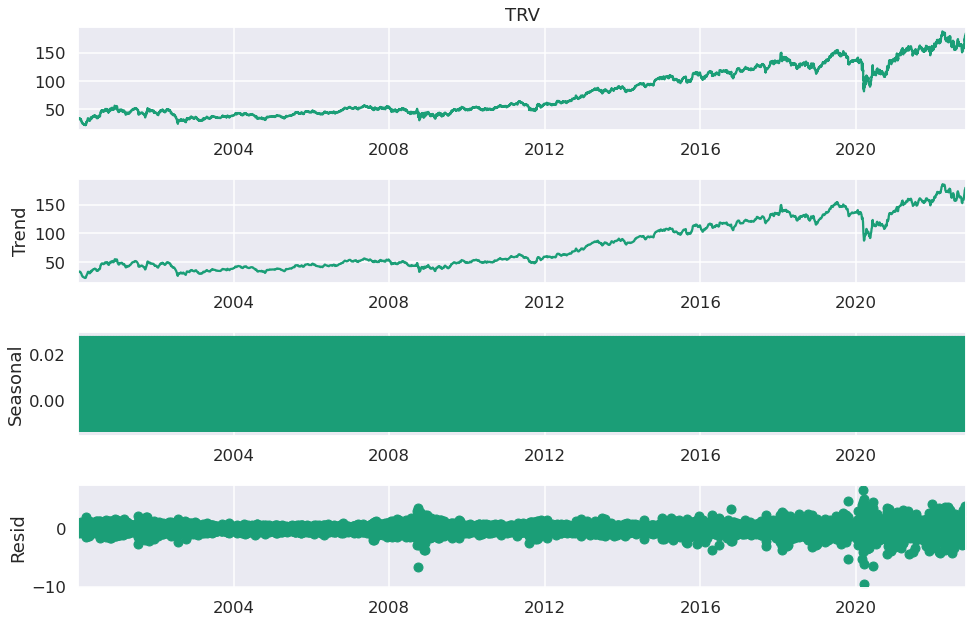

In [31]:
import statsmodels.api as sm
print('mean :' , close['TRV'].mean())
res = sm.tsa.seasonal_decompose(close['TRV'])
resplot = res.plot()
resplot.set_size_inches((14,9))
resplot.tight_layout()


In [32]:
close['TRV']

2000-01-03     33.000000
2000-01-04     32.562500
2000-01-05     32.312500
2000-01-06     32.937500
2000-01-07     34.250000
                 ...    
2022-10-25    176.089996
2022-10-26    176.399994
2022-10-27    177.600006
2022-10-28    181.960007
2022-10-31    184.460007
Freq: B, Name: TRV, Length: 5956, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

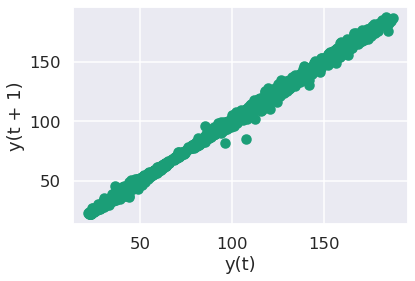

In [33]:
from pandas.plotting import lag_plot


lag_plot(close['TRV'])

In [34]:
from statsmodels.tsa.ar_model import AutoReg

train, test = close['TRV'][:-10], close['TRV'][-10:]
model = AutoReg(train, lags=24)
#model = AR(close['TRV'])
model_fit = model.fit()

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
predictions

#accuracy = root of (squared sums of differences between observed and predicted)

/home/joaodocarglass/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


2022-10-18    164.604644
2022-10-19    164.177872
2022-10-20    164.370459
2022-10-21    164.495985
2022-10-24    164.797098
2022-10-25    164.220936
2022-10-26    164.563831
2022-10-27    164.362324
2022-10-28    164.368139
2022-10-31    163.965005
Freq: B, dtype: float64

In [35]:
print(model_fit.params)

intercept    0.036658
TRV.L1       0.896956
TRV.L2       0.153737
TRV.L3      -0.052908
TRV.L4      -0.044433
TRV.L5       0.050877
TRV.L6      -0.066619
TRV.L7       0.091892
TRV.L8      -0.026777
TRV.L9       0.026124
TRV.L10     -0.063964
TRV.L11      0.039440
TRV.L12     -0.016718
TRV.L13      0.007129
TRV.L14      0.028886
TRV.L15     -0.076215
TRV.L16      0.045167
TRV.L17      0.017684
TRV.L18     -0.018080
TRV.L19     -0.054656
TRV.L20      0.060384
TRV.L21      0.005187
TRV.L22     -0.017818
TRV.L23      0.011540
TRV.L24      0.003086
dtype: float64


In [36]:
pd.DataFrame({'observed':close['TRV'], 'predicted':predictions})[-10:]

,observed,predicted
2022-10-18,166.770004,164.604644
2022-10-19,174.169998,164.177872
2022-10-20,170.869995,164.370459
2022-10-21,176.229996,164.495985
2022-10-24,179.789993,164.797098
2022-10-25,176.089996,164.220936
2022-10-26,176.399994,164.563831
2022-10-27,177.600006,164.362324
2022-10-28,181.960007,164.368139
2022-10-31,184.460007,163.965005


In [37]:
from statsmodels.tsa.stattools import adfuller
# H0: series is not stationary
# H1: series is stationary
adfuller(close['TRV'])


(0.2789307320857314,
 0.9763569209479531,
 26,
 5929,
 {'1%': -3.431453412620756,
  '5%': -2.8620276058789127,
  '10%': -2.5670295503074683},
 19878.81197423495)

In [38]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA is like linear regression fo time series

model = ARIMA(train, order=(21, 0, 1)) # moving average model: p=2 periods, d=1, q=0 period
# p = number of lag terms taken into account
# d = number of times the terms are differenced
# q = moving average window, number of error terms taken into account
model_fit = model.fit()
predictions = model_fit.predict(len(close['TRV'])-10, len(close['TRV'])-1)

In [39]:
pd.DataFrame({'observed':close['TRV'][-10:], 'predicted':predictions})


,observed,predicted
2022-10-18,166.770004,164.556635
2022-10-19,174.169998,164.151169
2022-10-20,170.869995,164.282817
2022-10-21,176.229996,164.327315
2022-10-24,179.789993,164.615250
2022-10-25,176.089996,163.994599
2022-10-26,176.399994,164.250653
2022-10-27,177.600006,164.023515
2022-10-28,181.960007,164.036634
2022-10-31,184.460007,163.633715


In [40]:
# fit model
model = ARIMA(train, order=(1,1,1)) # combined autoregression and moving average: n=2 periods, q= 1 period
model_fit = model.fit()
# make prediction
predictions = model_fit.predict(len(close['TRV'])-3, len(close['TRV'])-1)

In [41]:
pd.DataFrame({'observed':close['TRV'][-3:], 'predicted':predictions})


,observed,predicted
2022-10-27,177.600006,164.584800
2022-10-28,181.960007,164.584638
2022-10-31,184.460007,164.584701
